# Exploratory Data Analysis (EDA): Age-Group-Analysis
***

<p style="text-align: center;">
<img src="../../../images/age-group.jfif" alt="Demographics and Background" style="width: 500px; height: 350px;">
</p>


## Introduction
In this section, we will explore the impact of age on students' performance in exams. Understanding whether age influences academic success is crucial for educators and policymakers. 

## Research Questions
The primary questions guiding this analysis include:
   
1. **Impact of Double Promotion on Foundational Knowledge**
2. 1. **Does age affect performance?**

## Objectives
The main objectives of this analysis are:
1. **Assess Performance Trends**: Analyze how exam performance varies across different age groups.
2. **Evaluate Maturity Factors**: Determine whether older students exhibit better performance due to increased maturity and life experiences.
3. **Draw Insights**: Provide insights based on the analysis that can inform educational practices and interventions.

After the analysis is complete, we will summarize our findings, discuss the implications of age on exam performance, and suggest strategies to support students.

**Importing Dependencies**

In [15]:
import pandas as pd
from sqlalchemy import create_engine, inspect,text
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [16]:
# Database path in the schema folder
db_path = '../../../Schema/student_database.db'

# Creating a connection to the SQLite database
engine = create_engine(f'sqlite:///{db_path}')

with engine.connect() as conn:
    print("Connected to the database.")
    
    inspector = inspect(engine)
    tables = inspector.get_table_names()
    print("Tables in the database:", tables)

Connected to the database.
Tables in the database: ['student_performance']


## Does age affect performance in subject assimilation?

In [20]:
query = "SELECT * FROM student_performance LIMIT 5;"
df = pd.read_sql(query, con=engine)
df.head()

,Student ID,Gender,Age Group,Living Situation,Parent Education Level,Family Financial Status,Class,Department,Performance in English,Performance in Maths,...,School Learning Resources,Motivation for Attending School,Plan to Attend University,JAMB Goal Score,Extracurricular Hours,Free Time Activities,Language at Home,Involved in Work Outside School,Last Exam Performance,Foundational Knowledge
0,1001,Female,15 - 16,Both parents,Post-graduate education,We meet our needs but can't afford luxuries,SS2,Science,Excellent,Good,...,Library,To learn and gain knowledge,Yes,200 To 250,Less than 5 hours,Doing chores at home,Yoruba,Frequently,60% - 69%,Average
1,1002,Female,15 - 16,Both parents,Higher Education,We can afford some luxuries,SS3,Science,Good,Good,...,Library,To prepare for a good career,Yes,300 And Above,5 - 10 hours,Others,Yoruba,Occasionally,70% - 100%,Strong
2,1003,Male,15 - 16,Both parents,Post-graduate education,We meet our needs but can't afford luxuries,SS3,Science,Fair,Fair,...,Nil,To prepare for a good career,Not Sure,200 To 250,More than 10 hours,Playing sports,English,No,60% - 69%,Average
3,1004,Male,12 - 14,Both parents,Higher Education,We can afford some luxuries,SS3,Science,Good,Excellent,...,"Computer lab, Extra tutoring sessions",To learn and gain knowledge,Yes,300 And Above,Less than 5 hours,"Studying,Socializing with friends,Watching mov...",English,No,70% - 100%,Average
4,1005,Male,15 - 16,Single parent,Higher Education,We are financially comfortable,SS3,Science,Good,Fair,...,"Computer lab, Extra tutoring sessions",To prepare for a good career,Yes,200 To 250,Less than 5 hours,"Watching movies,Playing sports,Doing chores at...",English,No,60% - 69%,Strong


In [82]:
# Creating a dictionary to hold performance values by age group
performance_data = {}

for column in performance_columns:
    performance_data[column] = filtered_df.groupby('Age Group')[column].apply(list).to_dict()

# Printing the performance values for each subject by age group
for subject, values in performance_data.items():
    print(f"\n{subject} by Age Group:")
    for age_group, scores in values.items():
        print(f"{age_group}: {scores}")


Performance in Maths by Age Group:
12 - 14: ['Excellent', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Excellent', 'Good', 'Excellent', 'Good', 'Good', 'Fair', 'Poor', 'Fair', 'Good']
15 - 16: ['Good', 'Good', 'Fair', 'Fair', 'Excellent', 'Fair', 'Excellent', 'Excellent', 'Good', 'Excellent', 'Good', 'Good', 'Excellent', 'Excellent', 'Good', 'Good', 'Fair', 'Excellent', 'Fair', 'Excellent', 'Excellent', 'Fair', 'Excellent', 'Excellent', 'Good', 'Excellent', 'Excellent', 'Fair', 'Good', 'Good', 'Fair', 'Good', 'Fair', 'Good']
17 - 18: ['Excellent', 'Good']

Performance in English by Age Group:
12 - 14: ['Good', 'Good', 'Excellent', 'Good', 'Good', 'Good', 'Good', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Good', 'Good', 'Fair', 'Fair', 'Fair']
15 - 16: ['Excellent', 'Good', 'Fair', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Excellent', 'Excellent', 'Fair', 'Good', 'Excellent', 'Good', 'Good', 'Good', 'Good', 'Fair', 'Excellent', 'Good', 'Fair', 'Good', 'Good

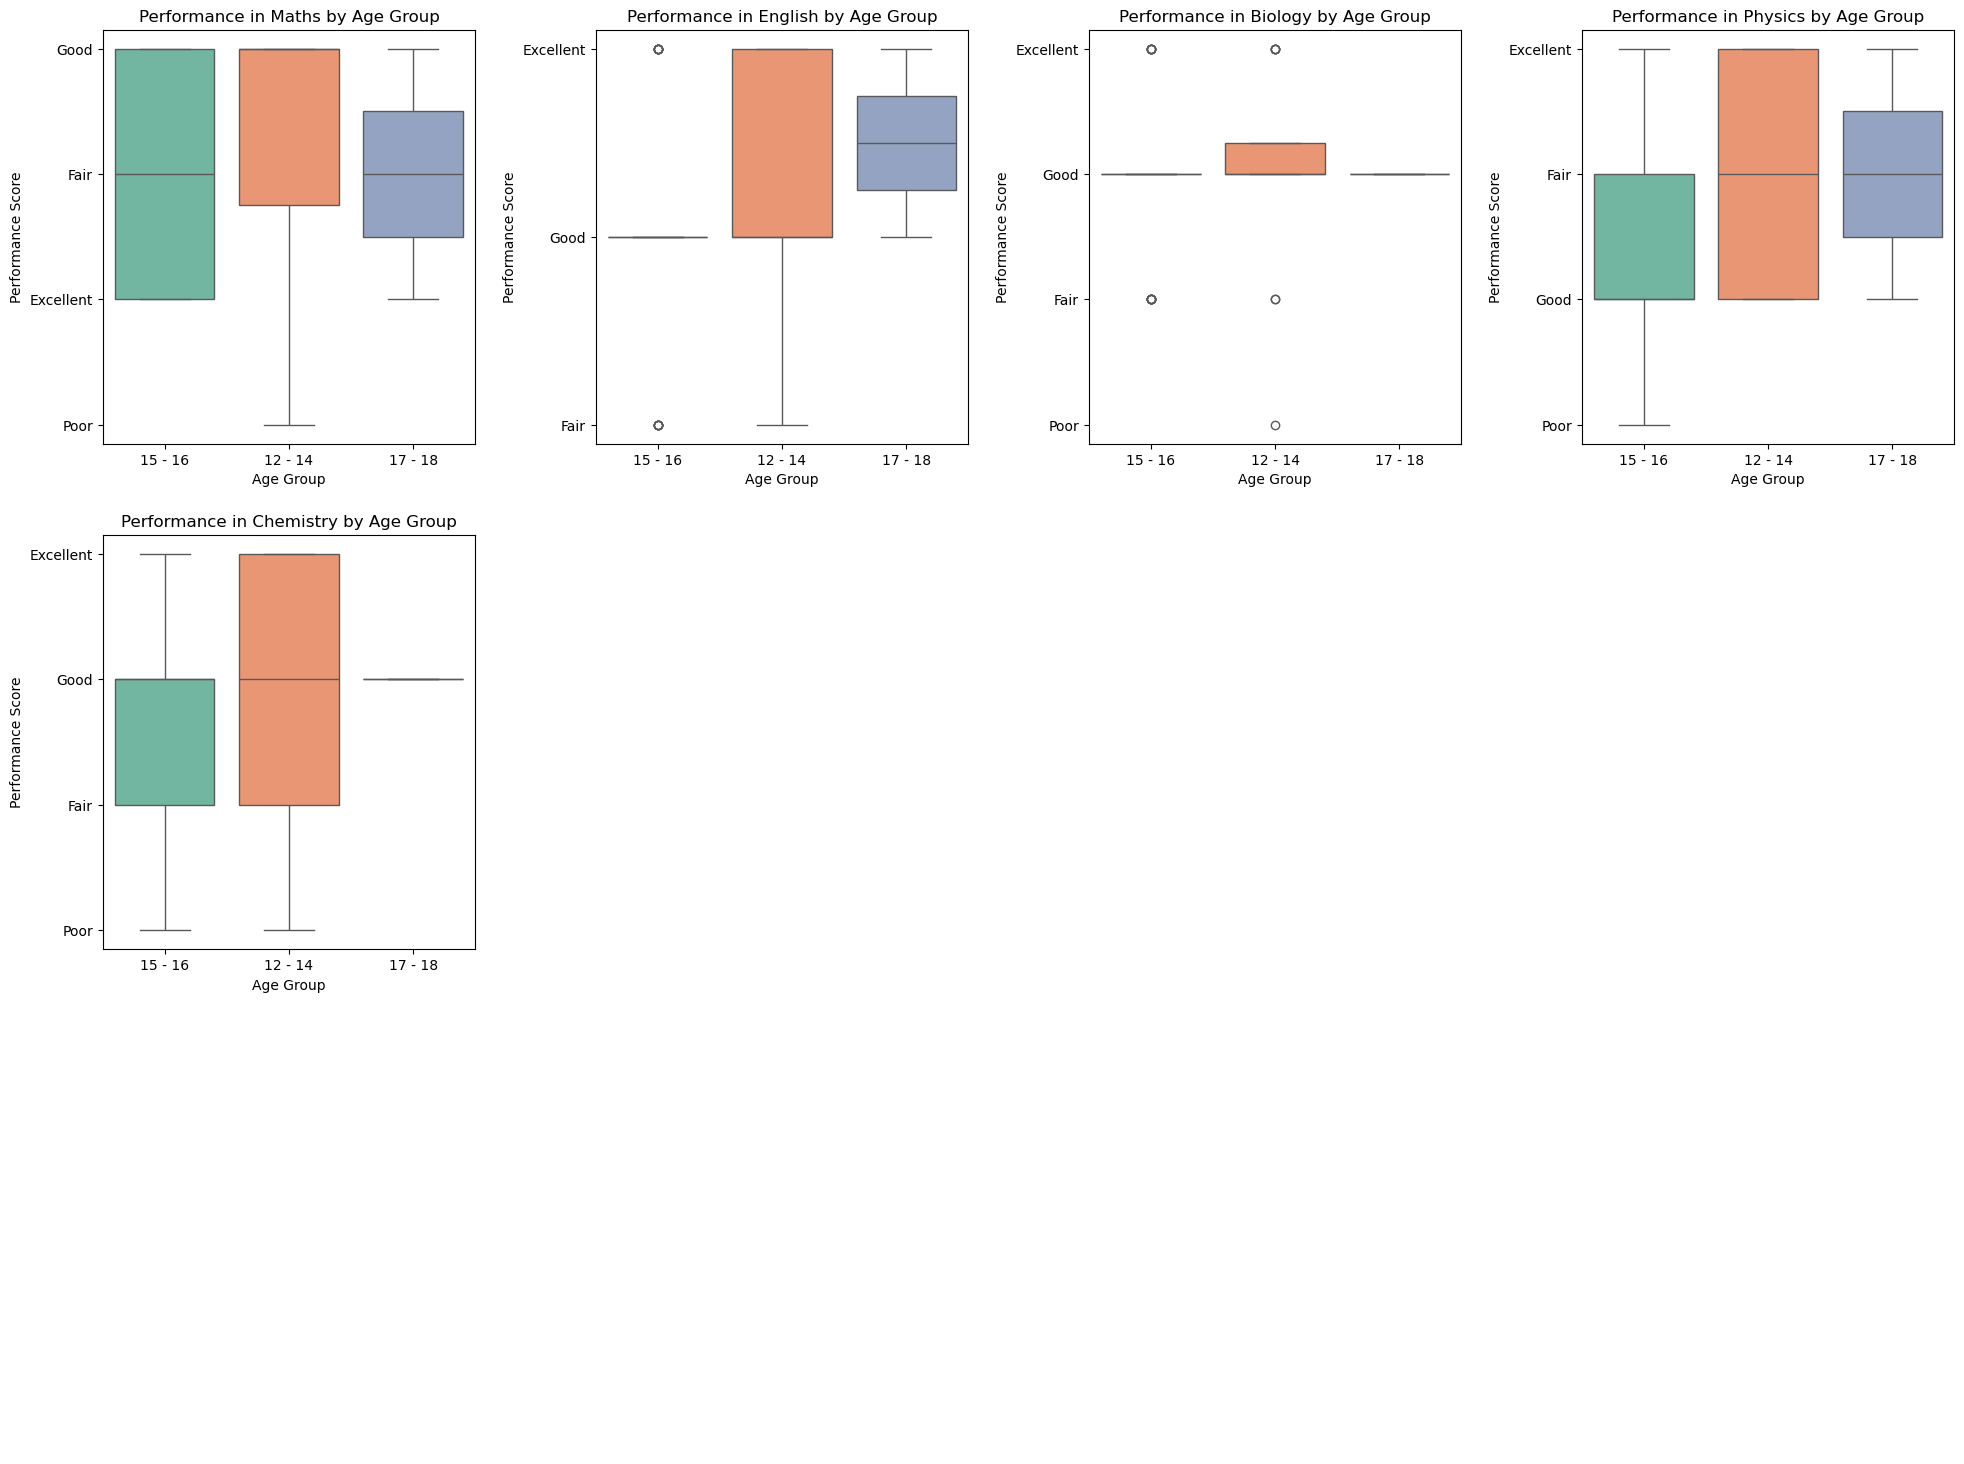

In [135]:

# Query to fetch student performance data
query = """
SELECT * 
FROM student_performance 
WHERE Department = 'Science'  -- Replace with the department you want to filter
"""

student_performance_df = pd.read_sql(query, engine)

filtered_df = student_performance_df.dropna(subset=[
    'Performance in Maths',
    'Performance in English',
    'Performance in Biology',
    'Performance in Physics',
    'Performance in Chemistry',
])

performance_columns = [
    'Performance in Maths',
    'Performance in English',
    'Performance in Biology',
    'Performance in Physics',
    'Performance in Chemistry',
]

# Getting unique age groups
age_groups = filtered_df['Age Group'].unique()
num_age_groups = len(age_groups)

# Setting up the figure and axes for subplots
fig, axes = plt.subplots(3, 4, figsize=(20, 15))
plt.subplots_adjust(hspace=0.4, wspace=0.4)

color_palette = sns.color_palette("Set2", n_colors=num_age_groups)

for i, column in enumerate(performance_columns):
    ax = axes[i // 4, i % 4]  # Determine the subplot position
    sns.boxplot(data=filtered_df, x='Age Group', y=column, ax=ax, palette=color_palette, hue='Age Group')
    ax.set_title(f'Performance in {column.split("in ")[1]} by Age Group')
    ax.set_xlabel('Age Group')
    ax.set_ylabel('Performance Score')

for j in range(len(performance_columns), len(axes.flatten())):
    axes.flatten()[j].axis('off')

plt.tight_layout(pad=2)

image_path = '../../../docs/Ageperformance1.png'  # Change to your desired path
plt.savefig(image_path)

plt.show()

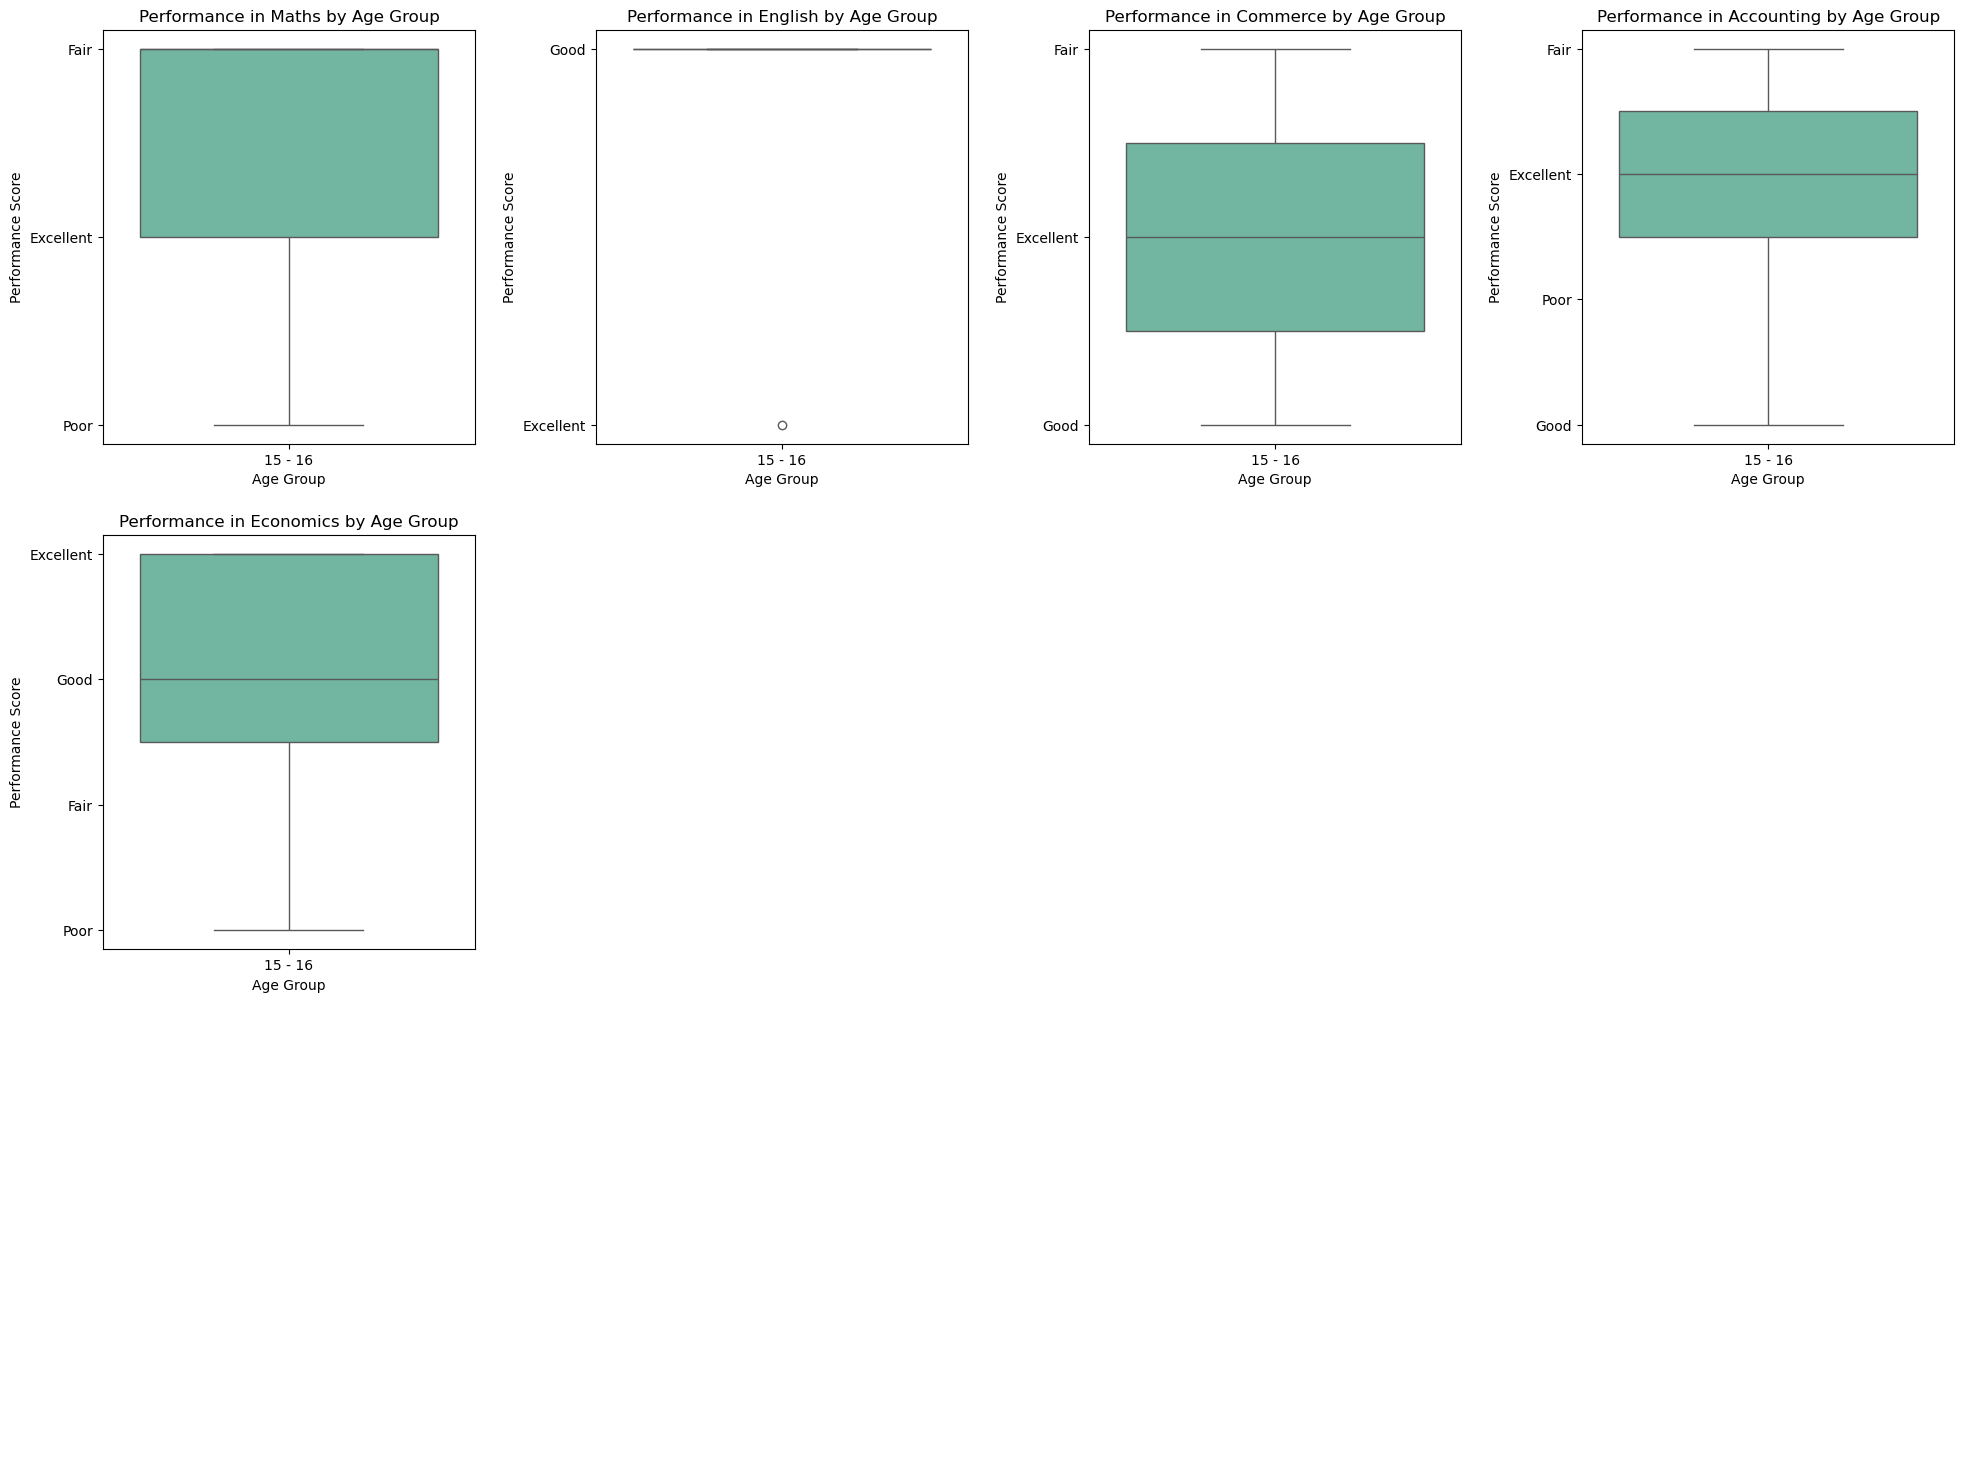

In [137]:

# Query to fetch student performance data
query = """
SELECT * 
FROM student_performance 
WHERE Department = 'Commercial' 
"""

# Load data into a DataFrame
student_performance_df = pd.read_sql(query, engine)

# Dropping rows with NaN values in performance columns
filtered_df = student_performance_df.dropna(subset=[
    'Performance in Maths',
    'Performance in English',
    'Performance in Commerce',
    'Performance in Accounting',
    'Performance in Economics'
])

# List of performance columns
performance_columns = [
    'Performance in Maths',
    'Performance in English',
    'Performance in Commerce',
    'Performance in Accounting',
    'Performance in Economics'
]

# Getting unique age groups
age_groups = filtered_df['Age Group'].unique()
num_age_groups = len(age_groups)

# Setting up the figure and axes for subplots
fig, axes = plt.subplots(3, 4, figsize=(20, 15))
plt.subplots_adjust(hspace=0.4, wspace=0.4)

color_palette = sns.color_palette("Set2", n_colors=num_age_groups)

for i, column in enumerate(performance_columns):
    ax = axes[i // 4, i % 4]  # Determine the subplot position
    sns.boxplot(data=filtered_df, x='Age Group', y=column, ax=ax, palette=color_palette, hue='Age Group')
    ax.set_title(f'Performance in {column.split("in ")[1]} by Age Group')
    ax.set_xlabel('Age Group')
    ax.set_ylabel('Performance Score')

for j in range(len(performance_columns), len(axes.flatten())):
    axes.flatten()[j].axis('off')

plt.tight_layout(pad=2)

image_path = '../../../docs/Ageperformance2.png'  # Change to your desired path
plt.savefig(image_path)

plt.show()

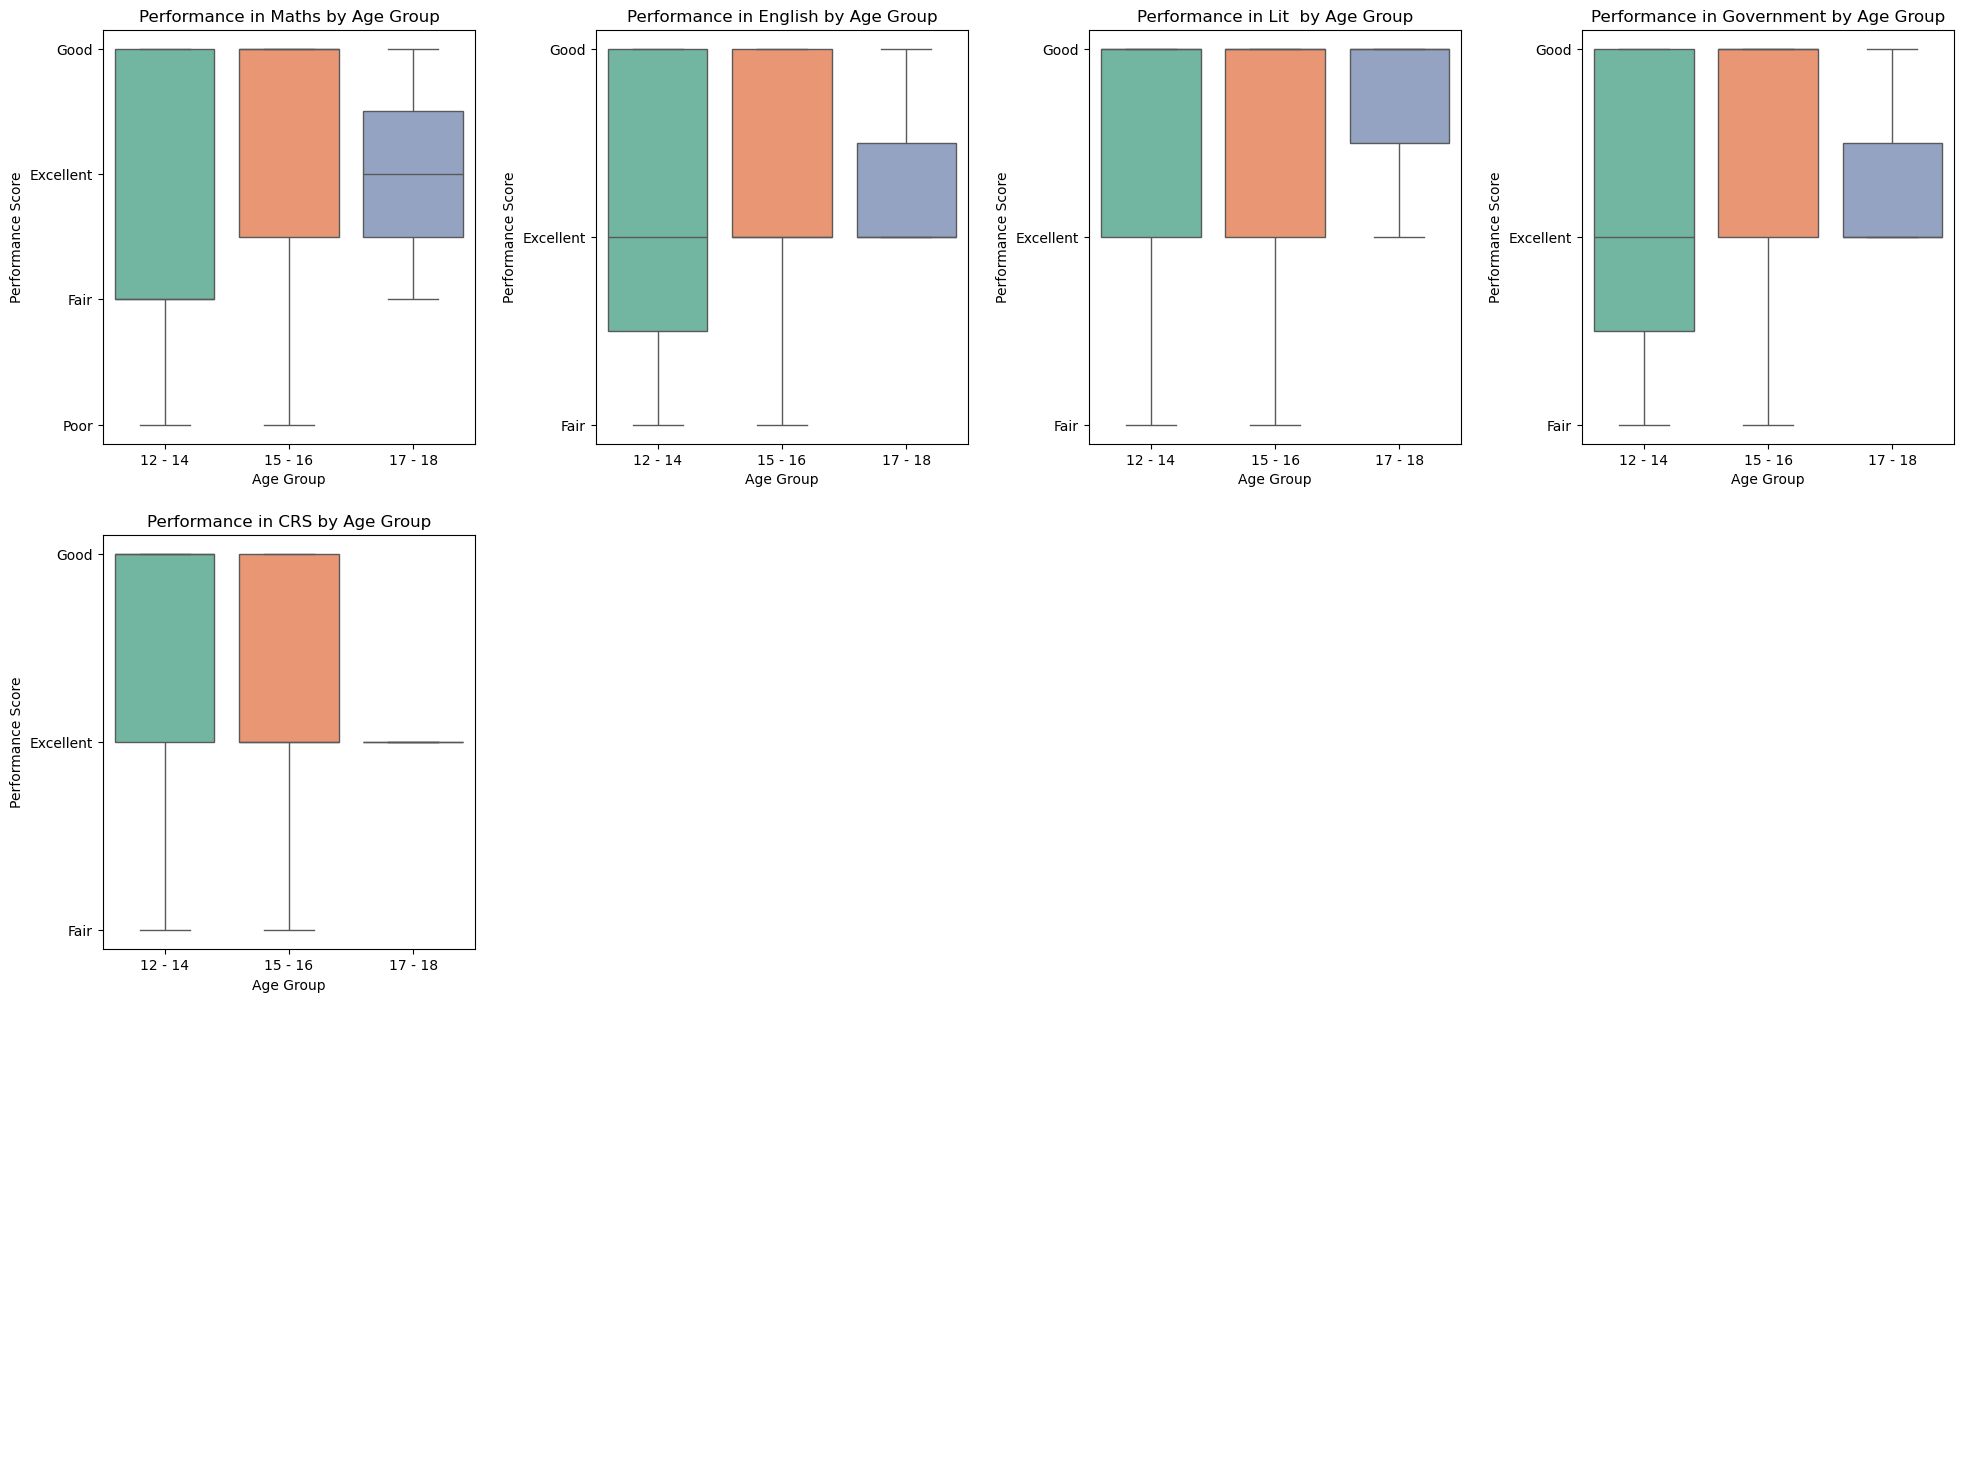

In [139]:

# Query to fetch student performance data
query = """
SELECT * 
FROM student_performance 
WHERE Department = 'Humanities' 
"""

# Load data into a DataFrame
student_performance_df = pd.read_sql(query, engine)

# Dropping rows with NaN values in performance columns
filtered_df = student_performance_df.dropna(subset=[
    'Performance in Maths',
    'Performance in English',
    'Performance in Lit in English',
    'Performance in Government',
    'Performance in CRS',
])

# List of performance columns
performance_columns = [
    'Performance in Maths',
    'Performance in English',
    'Performance in Lit in English',
    'Performance in Government',
    'Performance in CRS',
]

# Getting unique age groups
age_groups = filtered_df['Age Group'].unique()
num_age_groups = len(age_groups)

# Setting up the figure and axes for subplots
fig, axes = plt.subplots(3, 4, figsize=(20, 15))
plt.subplots_adjust(hspace=0.4, wspace=0.4)

color_palette = sns.color_palette("Set2", n_colors=num_age_groups)

for i, column in enumerate(performance_columns):
    ax = axes[i // 4, i % 4]  # Determine the subplot position
    sns.boxplot(data=filtered_df, x='Age Group', y=column, ax=ax, palette=color_palette, hue='Age Group')
    ax.set_title(f'Performance in {column.split("in ")[1]} by Age Group')
    ax.set_xlabel('Age Group')
    ax.set_ylabel('Performance Score')

for j in range(len(performance_columns), len(axes.flatten())):
    axes.flatten()[j].axis('off')

plt.tight_layout(pad=2)

image_path = '../../../docs/Ageperformance3.png'  # Change to your desired path
plt.savefig(image_path)

plt.show()

# Comparative Analysis of Performance by Age Group

## Performance Overview by Age Group

### 12 - 14 Age Group
- **Performance:** Mixed results across subjects.
- **Scores:** 
  - Notable instances of **'Good'** but also occurrences of **'Poor'** and **'Fair'**.
- **Conclusion:** Indicates foundational understanding with existing gaps.

### 15 - 16 Age Group
- **Performance:** Marked improvement in scores.
- **Scores:** 
  - Increased prevalence of **'Excellent'** scores, especially in Maths and English.
- **Conclusion:** Suggests maturation and possibly more effective teaching strategies or student engagement.

### 17 - 18 Age Group
- **Performance:** Limited but predominantly high scores.
- **Scores:** 
  - High instances of **'Good'** and **'Excellent'** in English and Biology.
- **Conclusion:** Indicates strong grasp of material among tested students, suggesting effective preparation for advanced education.

## Conclusion: Does Age Group Affect Performance in subject assimilation?

- **Key Finding:** **Yes, Age Group Does Affect Performance.**
  
  - As students progress through age groups (especially from 12-14 to 15-16), there is a significant enhancement in academic performance across subjects.
  - Increased prevalence of **'Excellent'** scores in older age groups indicates a correlation between age and improved performance.
  - The positive trend continues into the 17-18 age group, **reinforcing that older students are better equipped to handle academic challenges.**

## Recommendations

1. **Support for Younger Students (12-14):**
   - Provide tailored support to bridge gaps and improve performance for the transition to the next age group.

2. **Monitoring for 15-16 Age Group:**
   - Continued monitoring and support can maintain and enhance performance, especially in subjects with variability.

3. **Advanced Learning for 17-18 Age Group:**
   - Encourage advanced learning opportunities to consolidate knowledge and prepare for post-secondary education.

## Summary

- Age is a significant factor influencing academic performance, with older students generally outperforming younger counterparts.


___

___

# Problem Statement: Impact of Double Promotion on Foundational Knowledge

## Context
As part of my ongoing study, I am examining the effects of **double promotion** on students' foundational knowledge. Double promotion allows students, particularly those who are younger in secondary school, to skip classes. This practice may lead to gaps in essential foundational knowledge.

## Objective
To analyze the foundational knowledge of students according to age group and assess whether double promotion is advisable.

## Significance
This analysis aims to provide insights into the effectiveness of double promotion and its implications for students' academic success.


In [127]:
query = """
SELECT "Age Group", "Foundational Knowledge" 
FROM student_performance;
"""

foundational_knowledge_df = pd.read_sql(query, engine)

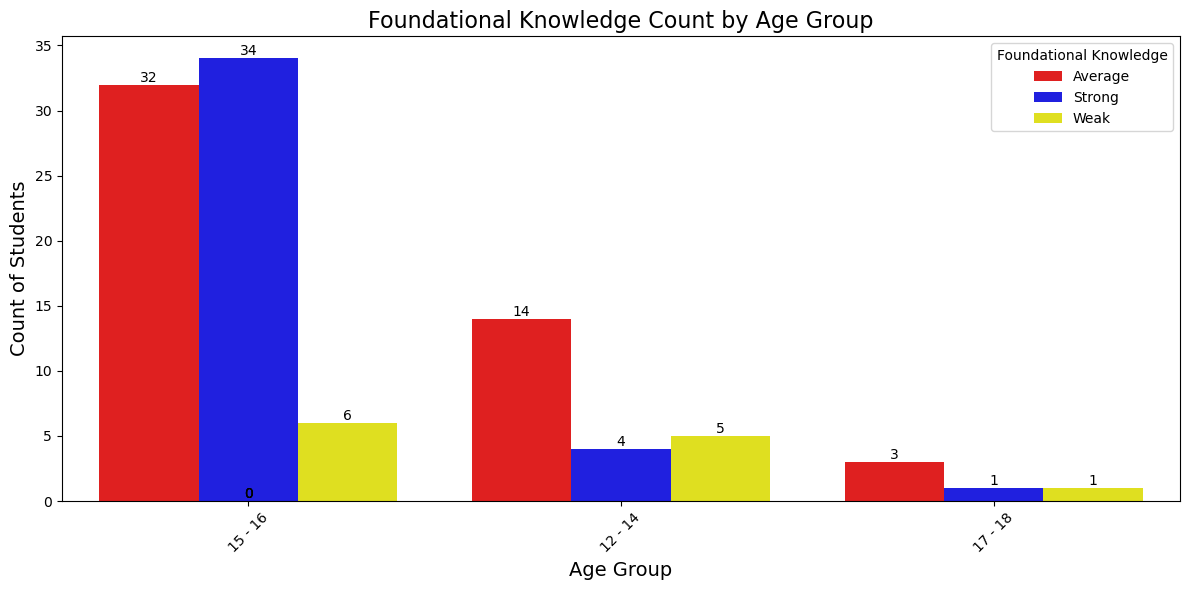

In [150]:
plt.figure(figsize=(12, 6))
palette = ['red', 'blue', 'yellow']  # Custom color palette
ax = sns.countplot(data=foundational_knowledge_df, x='Age Group', hue='Foundational Knowledge', palette=palette)

plt.title('Foundational Knowledge Count by Age Group', fontsize=16)
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('Count of Students', fontsize=14)
plt.xticks(rotation=45)

# Annotating bars with the count of occurrences
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=10)

image_path = '../../../docs/Ageknowledge.png'  # Change to your desired path
plt.savefig(image_path)

plt.tight_layout()
plt.legend(title='Foundational Knowledge')
plt.show()

# Insight on Foundational Knowledge and Double Promotion

## Foundational Knowledge by Age Group

| Age Group | Foundational Knowledge | Count |
|-----------|-----------------------|-------|
| 15 - 16   | Average               | 32    |
|           | Strong                | 34    |
|           | Weak                  | 6     |
| 12 - 14   | Average               | 14    |
|           | Strong                | 4     |
|           | Weak                  | 5     |
| 17 - 18   | Average               | 3     |
|           | Strong                | 1     |
|           | Weak                  | 1     |

## Analysis
Looking closely at the foundational knowledge of students, we see some important patterns that make us think about double promotion.

- In the **15 - 16** age group, most students are doing well. **34 students** show a **Strong** understanding of their subjects, while **32** are rated as **Average**. But there are still **6 students** who are **Weak**, and that raises a red flag.

- For the younger group, **12 - 14**, things look less encouraging. Only **4 students** have a **Strong** grasp, while **14** are **Average** and **5** are **Weak**. This is concerning because these foundational years are so important for their future.

- The **17 - p paints an even sadder picture. Here, we find only **3 students** who are **Average**, and just **1 student** each rated as **`Strong** and **Weak**. It shows that as students get older, those who struggled earlier may `continue to lag behind.

## Conclusion
These findings tell us a powerful story about why double promotion might not be the best idea. It’s clear that many younger students simply aren’t ready for the challenges of higher classes. While a few may be bright enough to keep up, most need more time to build a strong foundation.

Rushing students ahead might seem like a good way to encourage them, but it can actually leave many behind. They may need extra help to catch up, which isn’t always available to everyone. 

Education should be a journey where each child has the chance to grow at their own pace. By allowing students to develop their skills before moving on, we can help them succeed and feel confident in their abilities. Every child deserves the opportunity to thrive, and that starts with a solid foundation.
